In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('loan_data.csv')

# Quick overview
print(df.head())
print(df.info())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0   

In [2]:
# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Convert categorical to numeric
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Married'] = df['Married'].map({'Yes':1, 'No':0})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})
df['Property_Area'] = df['Property_Area'].map({'Urban':2, 'Semiurban':1, 'Rural':0})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

C:\Users\heman\AppData\Local\Temp\ipykernel_11288\825344008.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\heman\AppData\Local\Temp\ipykernel_11288\825344008.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.47      0.43      0.45        21
           1       0.79      0.82      0.81        56

    accuracy                           0.71        77
   macro avg       0.63      0.62      0.63        77
weighted avg       0.71      0.71      0.71        77

Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.47      0.43      0.45        21
           1       0.79      0.82      0.81        56

    accuracy                           0.71        77
   macro avg       0.63      0.62      0.63        77
weighted avg       0.71      0.71      0.71        77



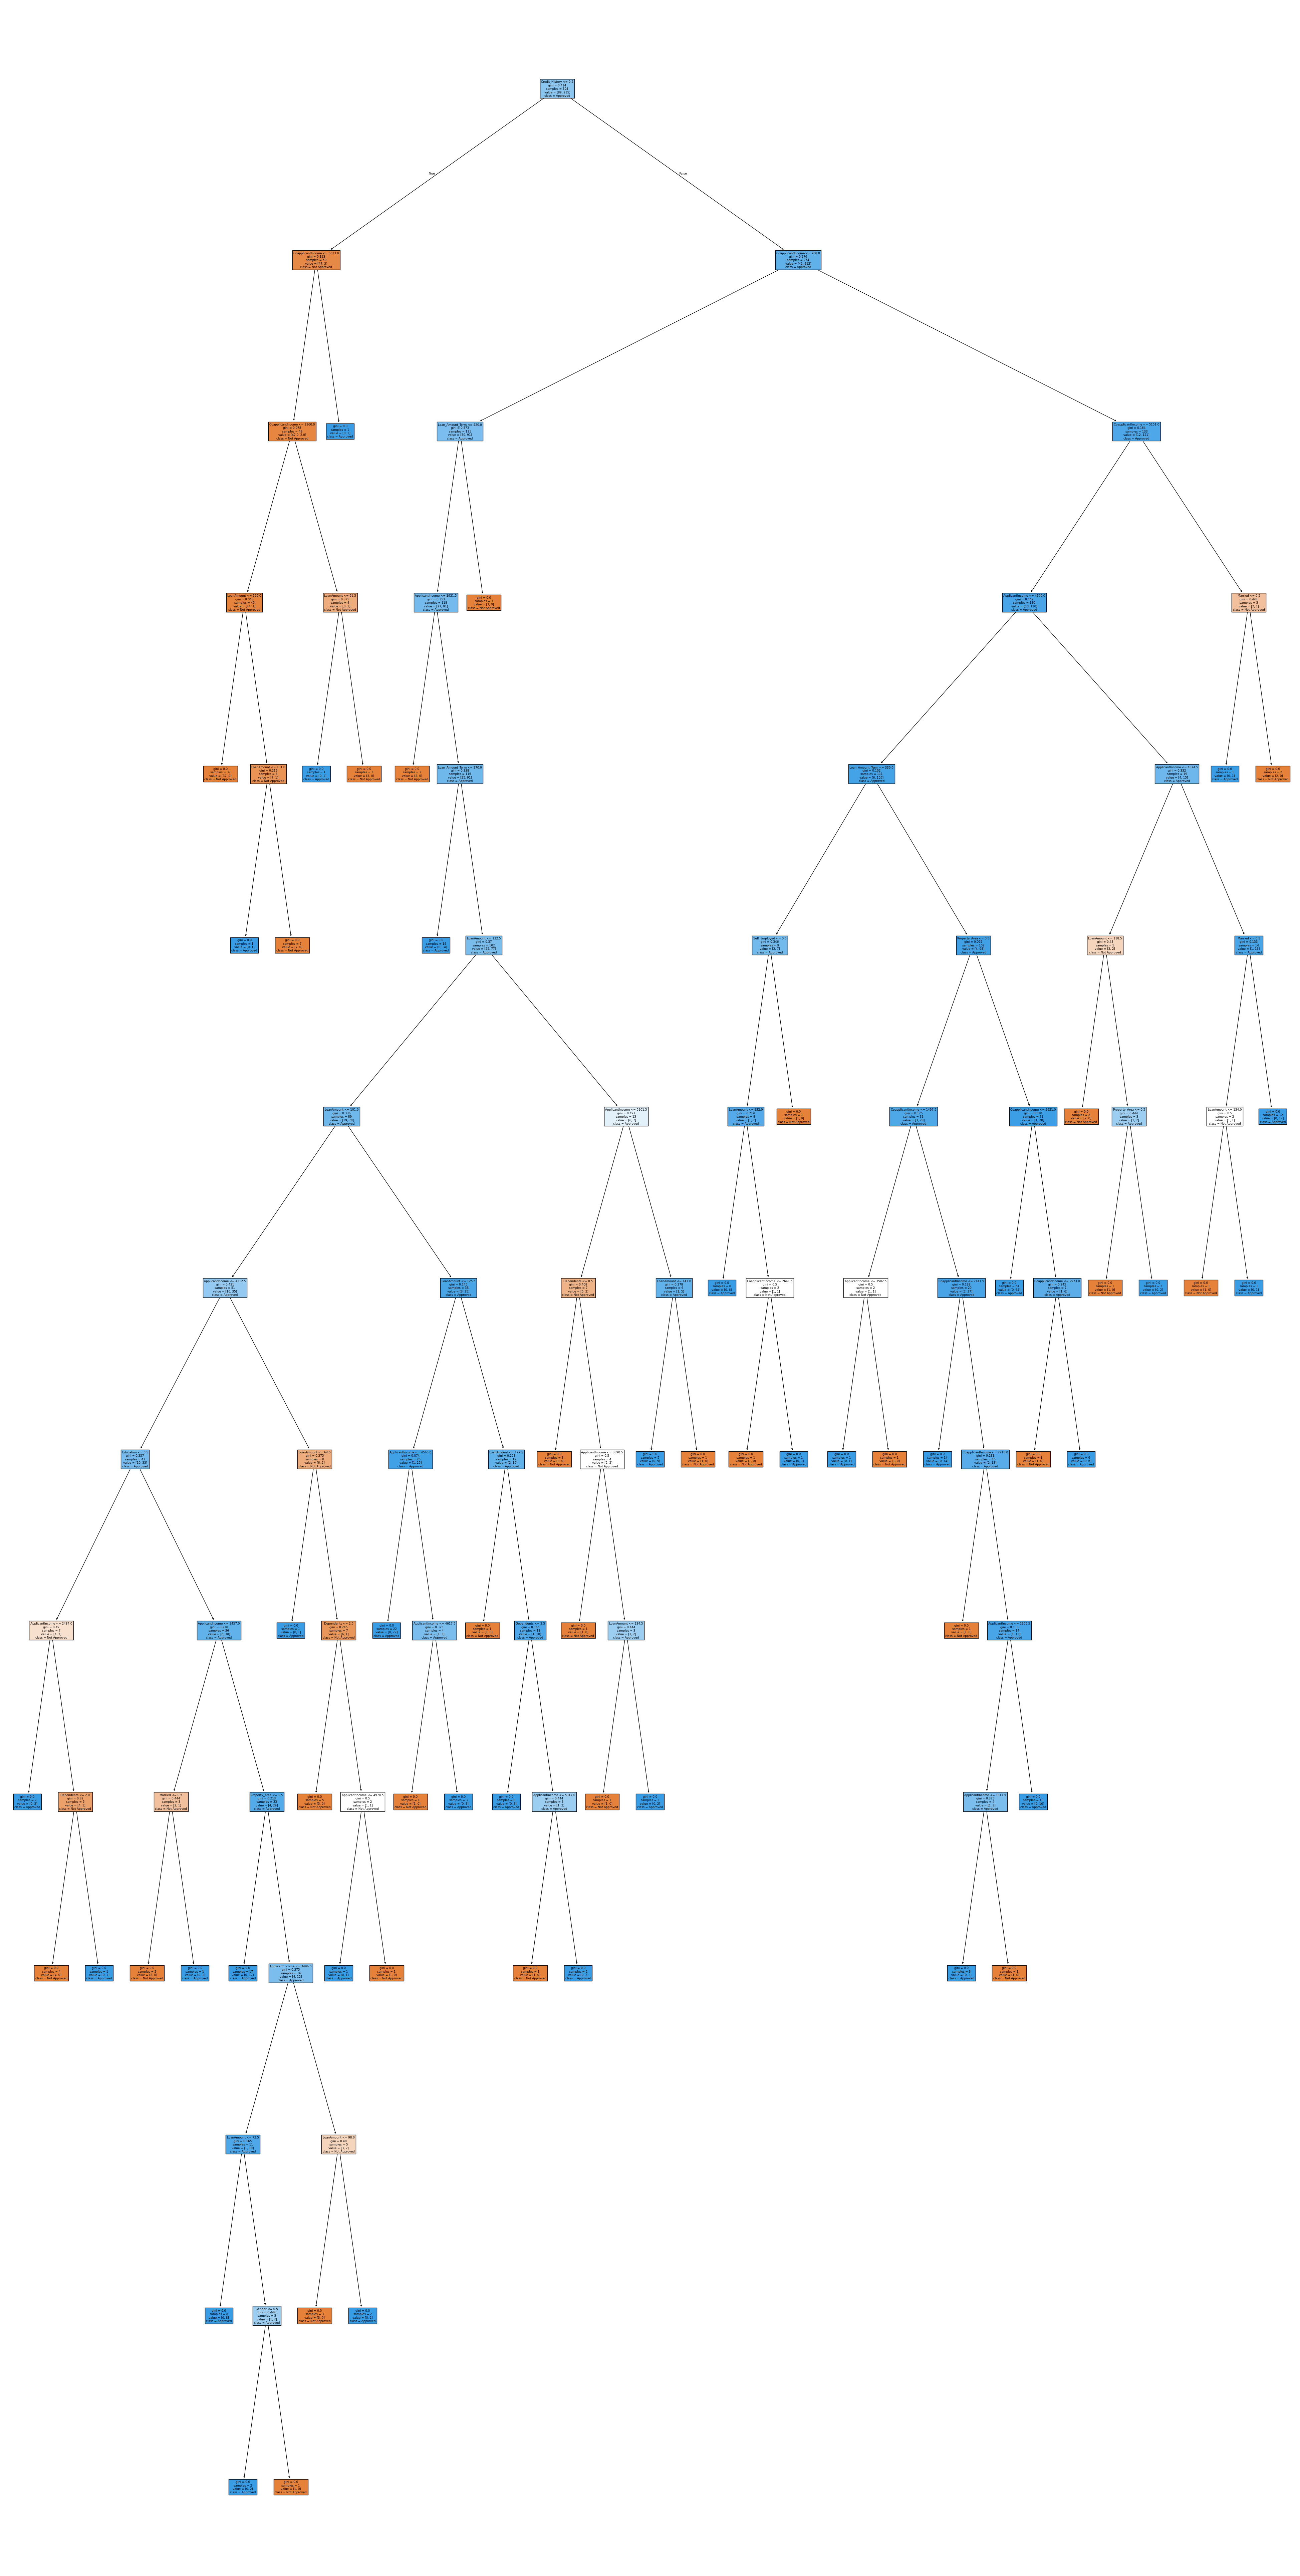

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50,100))
plot_tree(model, feature_names=X.columns, class_names=["Not Approved", "Approved"], filled=True)
plt.show()